R을 공부하며 Decision Tree를 정리했었는데, 파이썬에서 비슷한 내용을 정리해보고자 한다.
소스코드는 scikit-learn의 공식 튜토리얼 문서자료와 [Python Machine Learning]을 참고하였다.

파이썬에서 sklearn 모듈을 사용해서 의사결정 트리를 학습하는 과정은 R에 비하면 약간 덜 직관적이고, 조금 더 객체지향스러운 프로그래밍의 느낌이다. 
DecisionTreeClassifier라는 일종의 모델 helper를 사용하여 학습이 진행된다.

X,Y 데이터셋을 fit이라는 함수에 입력하는 간단한 절차를 거치면, 놀랍게도(?) 학습이 완료된다.

In [1]:
from sklearn import tree
X = [[0, 0], [1, 1]]
Y = [0, 1]
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)

모델의 predict 역시 간단하게 할 수 있다.

In [2]:
clf.predict([[2., 2.]])

array([1])

이제 iris 데이터로 Decision Tree를 테스트 해보자.
물론 그 전에 데이터를 간단하게 전처리하는 작업을 거쳐야 한다.

In [3]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

# 자동으로 데이터셋을 분리해주는 함수
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# 데이터 표준화 작업
sc = StandardScaler()
sc.fit(X_train)

# 표준화된 데이터셋
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

데이터의 정리가 완료되었으면, 이제 위에서 연습한 방법과 동일한 방법으로 트리를 학습시킨다.

In [4]:
iris_tree = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)
iris_tree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best')

학습된 모델을 test 데이터로 테스트해본 뒤, accuracy를 구해본다.

In [5]:
from sklearn.metrics import accuracy_score

y_pred_tr = iris_tree.predict(X_test)
print('Accuracy: %.2f' % accuracy_score(y_test, y_pred_tr))

Accuracy: 0.98


여기까지 의사결정트리의 학습이 훌륭하게 수행되었다.
하지만 트리의 장점은 역시 학습 모델을 시각화하여 볼 수 있다는 점이다.
python-jupyter에서 역시 아름다운 모습으로 트리의 시각화를 볼 수 있다.

이 과정을 하기 전에, graphviz라는 것을 설치해줘야 한다. mac의 경우 homebrew를 사용하여 간단하게 설치가 가능하고,
윈도우의 경우 공식 다운로드 페이지에서 다운로드를 받은 뒤, 환경 변수를 간단하게 설정해주면 된다.

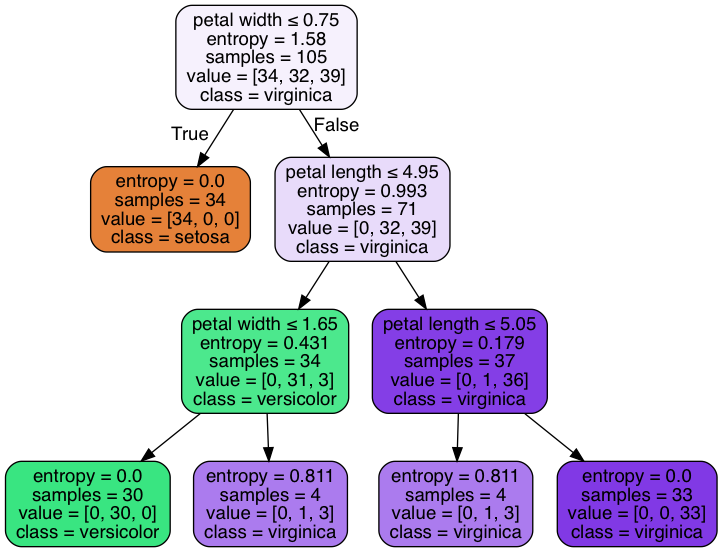

In [7]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image

dot_data = export_graphviz(iris_tree, out_file=None, feature_names=['petal length', 'petal width'],
                          class_names=iris.target_names, filled=True, rounded=True, special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())